# Loading The dataset & Analyze

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from matplotlib.colors import ListedColormap

In [77]:
#Load The Dataset
dataset = pd.read_csv('/content/abalone.data', sep=',', header=None)
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

#Joining the column names
dataset.columns = column_names

In [78]:
# Initial Overview of The Dataset

print(dataset.head())
print(dataset.describe())


  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  
            Length     Diameter       Height  WholeWeight  ShuckedWeight  \
count  4177.000000  4177.000000  4177.000000  4177.000000    4177.000000   
mean      0.523992     0.407881     0.139516     0.828742       0.359367   
std       0.120093     0.099240     0.041827     0.490389       0.221963   
min       0.075000     0.055000     0.000000     0.002000       0.001000   
25%    

<ipython-input-79-3dae7ef62b36>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


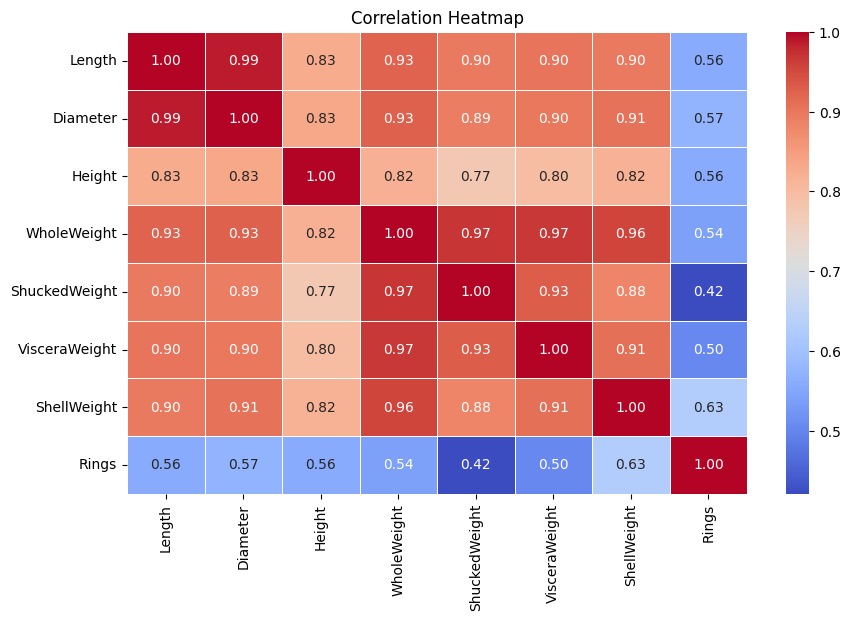

In [79]:
# correlation matrix

correlation_matrix = dataset.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# EDA

In [80]:
#Keeping Only the 5 Classes

top_n_classes = 5
class_counts = dataset['Rings'].value_counts()
top_n_classes = class_counts.head(top_n_classes).index.tolist()
dataset['NewClass'] = dataset['Rings'].apply(lambda x: x if x in top_n_classes else 'Other')

dataset2 = dataset[dataset['NewClass'] != 'Other']

dataset2.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,NewClass
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,8


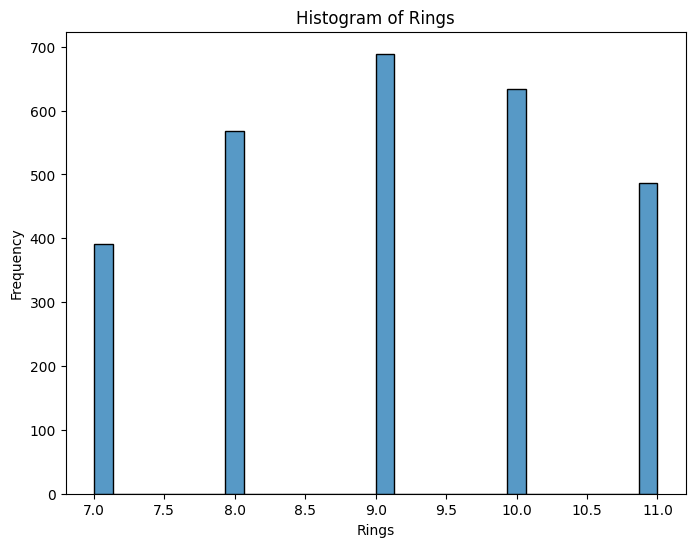

In [81]:
# Example: Histogram of the 'Rings' column
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset2, x='Rings', bins=30)
plt.title('Histogram of Rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

In [82]:
label_encoder = LabelEncoder()
dataset2['Sex'] = label_encoder.fit_transform(dataset2['Sex'])
dataset2['Sex'] = dataset2['Sex'] / (dataset2['Sex'].max() + 1)
dataset2['Sex'] = dataset2['Sex'].round(1)
dataset2.head()

<ipython-input-82-d7c9dce56ce4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['Sex'] = label_encoder.fit_transform(dataset2['Sex'])
<ipython-input-82-d7c9dce56ce4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['Sex'] = dataset2['Sex'] / (dataset2['Sex'].max() + 1)
<ipython-input-82-d7c9dce56ce4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,NewClass
1,0.7,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,9
3,0.7,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,10
4,0.3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,7
5,0.3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,8


In [83]:
columns_to_delete = ['Rings', 'Diameter', 'ShuckedWeight']
dataset2 = dataset2.drop(columns=columns_to_delete)


dataset2.rename(columns={'NewClass': 'Rings'}, inplace=True)

dataset2.head()

,Sex,Length,Height,WholeWeight,VisceraWeight,ShellWeight,Rings
1,0.7,0.350,0.090,0.2255,0.0485,0.070,7
2,0.0,0.530,0.135,0.6770,0.1415,0.210,9
3,0.7,0.440,0.125,0.5160,0.1140,0.155,10
4,0.3,0.330,0.080,0.2050,0.0395,0.055,7
5,0.3,0.425,0.095,0.3515,0.0775,0.120,8


In [84]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the numeric columns to be scaled (excluding non-numeric columns)
numeric_columns = dataset2.select_dtypes(include=['number']).columns

# Fit and transform the scaler to the selected columns
dataset2[numeric_columns] = scaler.fit_transform(dataset2[numeric_columns])
dataset2.head()

,Sex,Length,Height,WholeWeight,VisceraWeight,ShellWeight,Rings
1,1.170230,-1.850057,-1.337829,-1.378155,-1.336782,-1.407576,7
2,-1.233603,-0.049668,-0.145282,-0.351307,-0.410731,-0.193406,9
3,1.170230,-0.949862,-0.410292,-0.717470,-0.684563,-0.670401,10
4,-0.203389,-2.050100,-1.602839,-1.424778,-1.426400,-1.537665,7
5,-0.203389,-1.099895,-1.205323,-1.091592,-1.048013,-0.973943,8


In [85]:
X = dataset2.drop(columns=['Rings'])
y = dataset2['Rings']

In [86]:
X = X.reset_index(drop=True)
X = X.values
print(X)

[[ 1.17022984 -1.85005711 -1.33782867 -1.37815466 -1.3367818  -1.4075756 ]
 [-1.23360282 -0.04966766 -0.14528196 -0.35130675 -0.41073118 -0.19340558]
 [ 1.17022984 -0.94986239 -0.41029234 -0.71746957 -0.68456335 -0.67040094]
 ...
 [ 1.17022984  0.55046216 -0.14528196  0.30596688  0.31616877  0.2445629 ]
 [ 1.17022984  0.65048379  1.70979069  0.78357056  1.04306873  0.65651344]
 [-1.23360282  0.90053788  0.25223361  0.59821485  0.77919409  0.55244172]]


In [87]:
y = y.reset_index(drop=True)
y = y.values
y = y.astype(int)

print(y)
print(y.shape)

[ 7  9 10 ... 10  9 10]
(2769,)


# MLP

In [88]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [89]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.rand(input_size, hidden_size)
    W2 = np.random.rand(hidden_size, output_size)
    return W1, W2

In [90]:
def forward(X, W1, W2):
    H_in = np.dot(X, W1)
    H_out = sigmoid(H_in)

    O_in = np.dot(H_out, W2)
    O_out = sigmoid(O_in)

    return H_out, O_out

In [91]:
def backward(X, Tp, H_out, Op, W1, W2, lr):
    Ep = Tp - Op
    Del_O = Ep * sigmoid_derivative(Op)

    H_err = Del_O.dot(W2.T)
    Del_H = H_err * sigmoid_derivative(H_out)

    W2 += np.outer(H_out, Del_O) * lr
    W1 += np.outer(X, Del_H) * lr

    return W1, W2


In [110]:
def calculate_loss(Tp, Op):
    return np.mean((Tp - Op) ** 2)

def train_mlp(X_train, y_train, input_size, hidden_size, output_size, epochs, lr):
    W1, W2 = initialize_weights(input_size, hidden_size, output_size)
    loss_history = []

    for epoch in range(epochs):
        for X, Tp in zip(X_train, y_train):
            H_out, Op = forward(X, W1, W2)
            W1, W2 = backward(X, Tp, H_out, Op, W1, W2, lr)

        if epoch % 5 == 0:
            total_loss = 0
            for X, Tp in zip(X_train, y_train):
                _, Op = forward(X, W1, W2)
                total_loss += calculate_loss(Tp, Op)
            avg_loss = total_loss / len(X_train)
            loss_history.append(avg_loss)
            #print(f'Epoch {epoch}, Loss: {avg_loss}')

    # Plotting the loss graph
    plt.plot(range(0, epochs, 5)[:len(loss_history)], loss_history, marker='o', linestyle='-', color='b')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    return W1, W2

# Train Test Split

In [93]:
# One Hot Encoding
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((2215, 6), (2215, 5), (554, 6), (554, 5))

# Training with all features

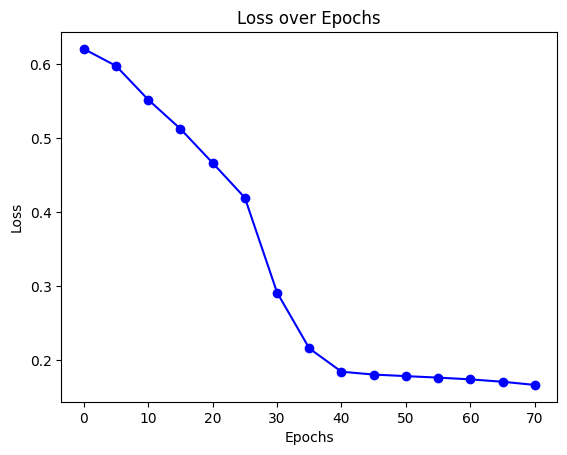

In [150]:
input_size = X_train.shape[1]
hidden_size = 12
output_size = 5

epochs = 75
learning_rate = 0.0005

trained_W1, trained_W2 = train_mlp(X_train, y_train, input_size, hidden_size, output_size, epochs, learning_rate)

In [151]:
def predict(X, W1, W2):
    H_out, Op = forward(X, W1, W2)
    return Op.argmax(axis=0)

def calculate_accuracy(X_test, y_test, trained_W1, trained_W2):
    correct_predictions = 0
    total_samples = len(X_test)

    for X, true_label in zip(X_test, y_test):
        predicted_label = predict(X, trained_W1, trained_W2)
        if predicted_label == true_label.argmax():
            correct_predictions += 1

    accuracy = correct_predictions / total_samples
    return accuracy

# Assuming y_test is in one-hot encoded format
accuracy = calculate_accuracy(X_test, y_test, trained_W1, trained_W2)

print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


Accuracy on the test set: 31.23%


# Xor Problem

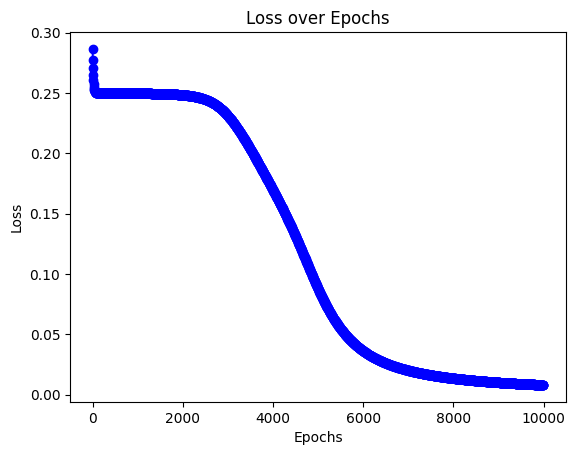

Input: [0 0], Target: 0, Predicted Output: 0.11364221229949091
Input: [0 1], Target: 1, Predicted Output: 0.9168284304708115
Input: [1 0], Target: 1, Predicted Output: 0.9103556972228541
Input: [1 1], Target: 0, Predicted Output: 0.06726768343497751
Accuracy: 100.0%


In [157]:
import numpy as np

import numpy as np

# XOR input and output
X1 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y1 = np.array([[0], [1], [1], [0]])

# Model parameters
input_size = 2
hidden_size = 4
output_size = 1
epochs = 10000
lr = 0.1

# Train the model on XOR problem
W1, W2 = train_mlp(X1, y1, input_size, hidden_size, output_size, epochs, lr)

# Test the trained model on XOR inputs
correct_predictions = 0
for x_test, target in zip(X1, y1):
    _, prediction = forward(x_test, W1, W2)
    print(f'Input: {x_test}, Target: {target[0]}, Predicted Output: {prediction[0]}')

    # Check accuracy
    if round(prediction[0]) == target[0]:
        correct_predictions += 1

accuracy = correct_predictions / len(X1)
print(f'Accuracy: {accuracy * 100}%')



<ipython-input-159-ab172d5c6df6>:23: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, zz, levels=[0.5], colors='red', label='Decision Boundary')


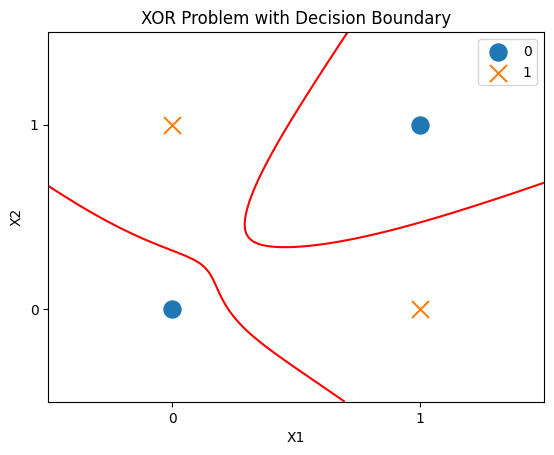

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Function to forward pass through the trained model
def predict(x):
    _, prediction = forward(x, W1, W2)
    return prediction[0]

# Create a meshgrid for plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
zz = np.array([predict(np.array([xi, yi])) for xi, yi in zip(xx.ravel(), yy.ravel())])
zz = zz.reshape(xx.shape)

# Scatterplot of XOR points with different markers for each class
plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], marker='o', s=150, label='0')
plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], marker='x', s=150, label='1')

# Contour plot for the decision boundary
plt.contour(xx, yy, zz, levels=[0.5], colors='red', label='Decision Boundary')

plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR Problem with Decision Boundary')
plt.legend()
plt.show()
